In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics

In [2]:
df1 = pd.read_csv(r"Resale Flat Prices 1990 - 1999.CSV")
df2 = pd.read_csv(r"Resale Flat Prices  2000 - Feb 2012.CSV")
df3 = pd.read_csv(r"Resale Flat Prices 2012 to Dec 2014.CSV")
df4 = pd.read_csv(r"Resale Flat Prices 2015 to Dec 2016.CSV")
df5 = pd.read_csv(r"Resale flat prices 2017 onwards.CSV")


In [3]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942780 entries, 0 to 942779
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                942780 non-null  object 
 1   town                 942780 non-null  object 
 2   flat_type            942780 non-null  object 
 3   block                942780 non-null  object 
 4   street_name          942780 non-null  object 
 5   storey_range         942780 non-null  object 
 6   floor_area_sqm       942780 non-null  float64
 7   flat_model           942780 non-null  object 
 8   lease_commence_date  942780 non-null  int64  
 9   resale_price         942780 non-null  float64
 10  remaining_lease      233730 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 79.1+ MB


In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df['remaining_lease'].fillna('0',inplace = True)

In [7]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [8]:
df.shape

(942780, 11)

In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [10]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [11]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [12]:
#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [13]:
encoding(df,'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI GENERATION : 6


In [14]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [15]:
df['block'].unique()

array(['309', '216', '211', ..., '609B', '608B', '606D'], dtype=object)

In [16]:
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [17]:
#split the storeyrange
df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True)

#changing the following columns into numeric
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_start,storey_end
0,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,0,10,12
1,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,0,4,6
2,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,0,10,12
3,1990-01,ANG MO KIO,0,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,0,7,9
4,1990-01,ANG MO KIO,2,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,0,4,6


In [18]:
#handle the str error
df['flat_model']=df['flat_model'].str.upper()
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [19]:
encoding(df,'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [20]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [21]:
encoding(df,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [22]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [23]:
#splitting month column to year and month
df['reg_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['reg_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [24]:

df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [25]:
# street_name is not necessary column in calculating the price.
df['street_name'].unique()
df.drop(columns='street_name',inplace=True)


In [26]:
df[['town','flat_type','flat_model']]=df[['town','flat_type','flat_model']].astype('int64')
df.head()

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_start,storey_end,reg_year,reg_month
0,1990-01,0,0,309,31.0,5,1977,9000.0,0,10,12,1990,1
1,1990-01,0,0,309,31.0,5,1977,6000.0,0,4,6,1990,1
2,1990-01,0,0,309,31.0,5,1977,8000.0,0,10,12,1990,1
3,1990-01,0,0,309,31.0,5,1977,6000.0,0,7,9,1990,1
4,1990-01,0,2,216,73.0,12,1976,47200.0,0,4,6,1990,1


   flat_type  flat_model
0          0           1
1          1           6
2          2           9
3          3          12
4          4          11
5          5           5
6          6           1


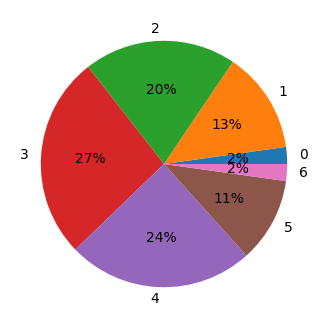

In [27]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

observation from pie chart 
* 4 room , 5 room and 3 room holds the most number of shares of the flat model

<Axes: title={'center': 'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

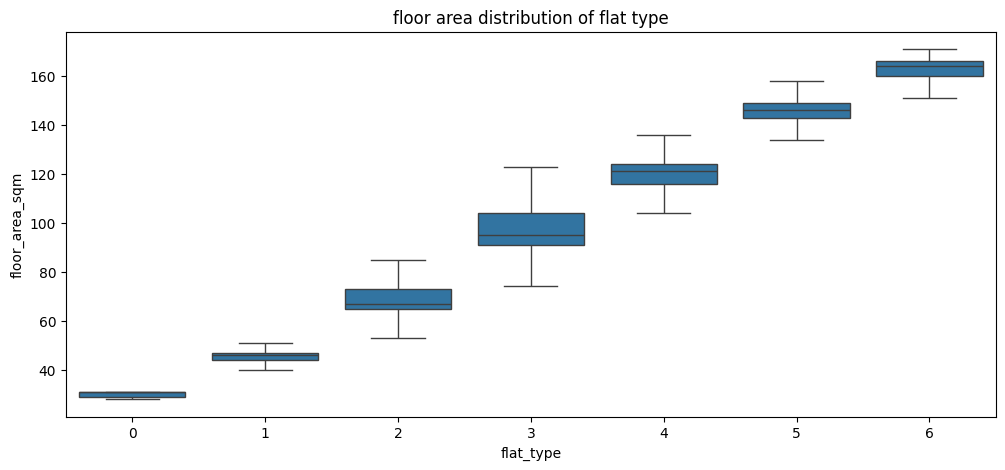

In [28]:
import seaborn as sns


plt.figure(figsize = (12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

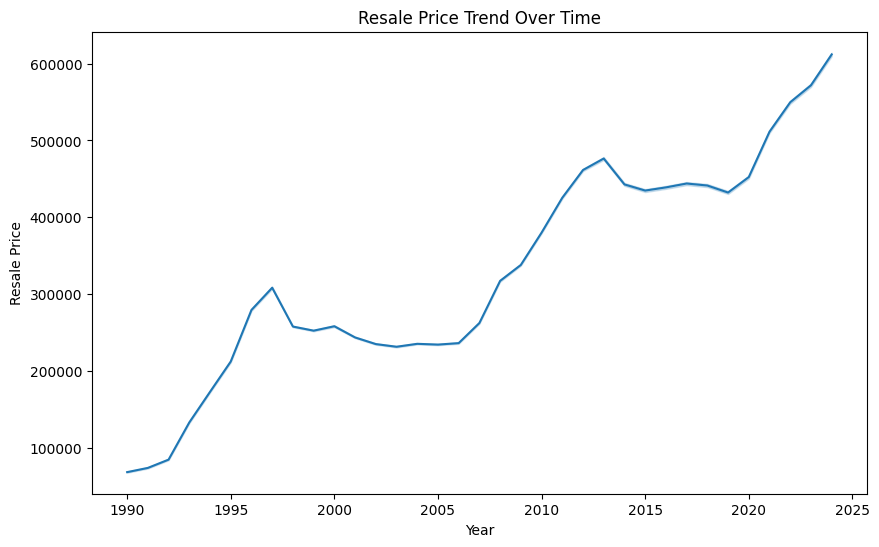

In [29]:
df['lease_commence_date'] = df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [30]:
df.drop(columns='month', inplace=True)

In [31]:
df.drop("remaining_lease",inplace = True , axis = 1)

In [32]:
df.head(3)

,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_start,storey_end,reg_year,reg_month
0,0,0,309,31.0,5,1977,9000.0,10,12,1990,1
1,0,0,309,31.0,5,1977,6000.0,4,6,1990,1
2,0,0,309,31.0,5,1977,8000.0,10,12,1990,1


C:\Users\Diwa\AppData\Local\Temp\ipykernel_8676\3792240162.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[feature_cols].corr(),cmap="Reds", annot = True)


<Axes: title={'center': 'Correlation Matrix'}>

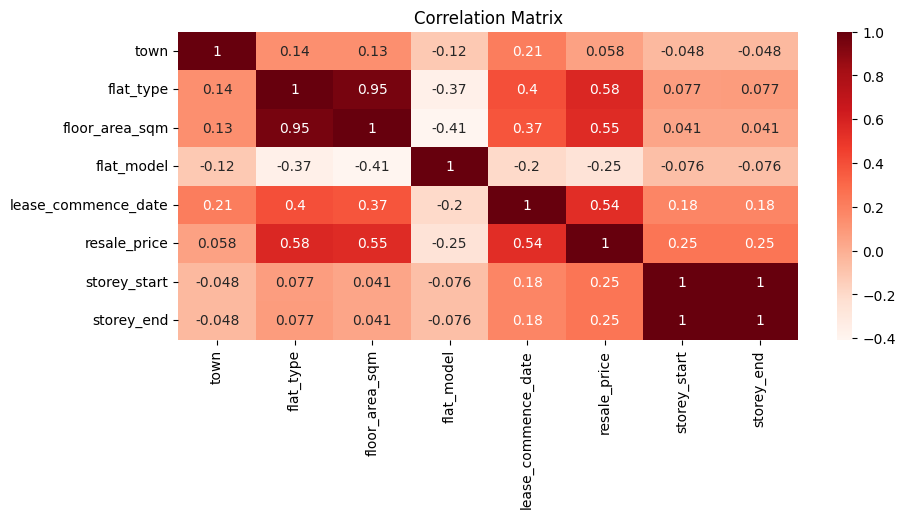

In [33]:
feature_cols = ['town', 'flat_type', 'block', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price','storey_start', 'storey_end']
plt.figure(figsize = (10,4))
plt.title('Correlation Matrix')
sns.heatmap(df[feature_cols].corr(),cmap="Reds", annot = True)

In [34]:
# Split the data into features and target
#split the data into x and y 

x=df.drop(['resale_price'],axis=1)
y=df['resale_price']

x.shape,y.shape

((942780, 10), (942780,))

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
x_train

,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,storey_start,storey_end,reg_year,reg_month
942246,26,3,613,85.0,16,1987,7,9,2024,4
292304,2,4,136,119.0,5,1987,4,6,2000,3
837134,12,4,258,121.0,5,1983,4,6,2021,2
691359,13,4,663,110.0,5,2000,4,6,2013,11
1514,0,2,247,67.0,12,1978,4,6,1990,2
...,...,...,...,...,...,...,...,...,...,...
259178,11,2,328,67.0,12,1983,10,12,1999,6
365838,25,4,214,118.0,5,1981,25,27,2002,2
131932,1,2,537,83.0,12,1980,4,6,1996,8
671155,21,3,275,90.0,13,2009,1,3,2012,9


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61334.92975364934
MSE = 6810759485.872312
RMSE  = 82527.32569199314
R2 Score = 0.7784973600938786


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 33047.833234863625
MAE is - 2351109700.994947
RMSE is - 48488.242915112394
Accuracy Score is - 0.923536133296216


In [39]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 19930.621940022364
MAE is - 958905440.9039259
RMSE is - 30966.198360533795
R2 Score is - 0.9688140379907485


In [40]:
input_data = pd.DataFrame([[0, 0,309,31.0,7,1977,10,12,1990,1]], 
                          columns=['town', 'flat_type', 'block', 
                                   'floor_area_sqm', 'flat_model', 'lease_commence_date', 'storey_start', 'storey_end',
                                   'reg_year', 'reg_month'])
predict = decision_tree_regressor.predict(input_data)

print(f"Prediction for the input data: {predict[0]}")

Prediction for the input data: 8000.0


In [41]:
import pickle
with open ('decision_tree_regressor.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)

In [42]:

with open('/decision_tree_regressor.pkl', 'rb') as f:
    model = pickle.load(f)
    
input_data = pd.DataFrame([[0, 0,309,31.0,7,1977,10,12,1990,1]], 
                          columns=['town', 'flat_type', 'block',
                                   'floor_area_sqm', 'flat_model', 'lease_commence_date',
                                    'storey_start', 'storey_end', 'reg_year', 'reg_month'])
predict = decision_tree_regressor.predict(input_data)

print(f"Prediction for the input data: {predict[0]}")

Prediction for the input data: 8000.0
